# Setup

### Library Imports

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import math
import pylab
from scipy.stats import norm
import statsmodels.api as sm
from scipy.stats import shapiro
import numpy as np
import seaborn as sns
import scipy.optimize as sco
from sklearn.cluster import KMeans

### Stock Data Imports

In [20]:
aapl = yf.Ticker("AAPL")
amzn = yf.Ticker("AMZN")
goog = yf.Ticker("GOOG")
intc = yf.Ticker("INTC")
orcl = yf.Ticker("ORCL")
xom = yf.Ticker("XOM")
cvx = yf.Ticker("CVX")
cop = yf.Ticker("COP")
hes = yf.Ticker("HES")
oxy = yf.Ticker("OXY")

### Stock Close Prices Extraction

In [21]:
aaplClosePrices = pd.DataFrame(aapl.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
amznClosePrices = pd.DataFrame(amzn.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
googClosePrices = pd.DataFrame(goog.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
intcClosePrices = pd.DataFrame(intc.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
orclClosePrices = pd.DataFrame(orcl.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
xomClosePrices = pd.DataFrame(xom.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
cvxClosePrices = pd.DataFrame(cvx.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
copClosePrices = pd.DataFrame(cop.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
hesClosePrices = pd.DataFrame(hes.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
oxyClosePrices = pd.DataFrame(oxy.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])

In [22]:
stockNames = ["aapl", "amzn", "goog", "intc", "orcl", "xom", "cvx", "cop", "hes", "oxy"]

# Testing if AAPL Daily Returns form a Normal Dsitribution

In [25]:
# calculating Daily Returns
aaplDailyReturns = aaplClosePrices.pct_change().dropna(axis=0)

### Testing for Normal Distribution

#### Visual Method

(array([   2.,    2.,    3.,   14.,   48.,  274., 1220.,  782.,  134.,
          23.,    6.,    5.,    2.]),
 array([-0.12864709, -0.10953513, -0.09042317, -0.07131121, -0.05219924,
        -0.03308728, -0.01397532,  0.00513664,  0.0242486 ,  0.04336056,
         0.06247252,  0.08158449,  0.10069645,  0.11980841]),
 <BarContainer object of 13 artists>)

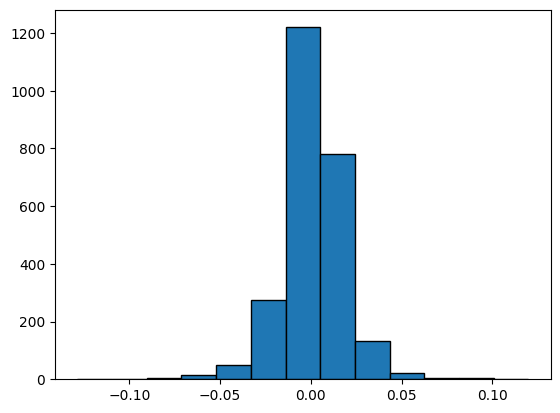

In [26]:
# Used Sturge's Rule for optimal numbers of bins
numObservations = len(aaplDailyReturns)
binCount = math.ceil(1 + 3.322 * math.log10(numObservations))
plt.hist(aaplDailyReturns, edgecolor="black", bins=binCount)

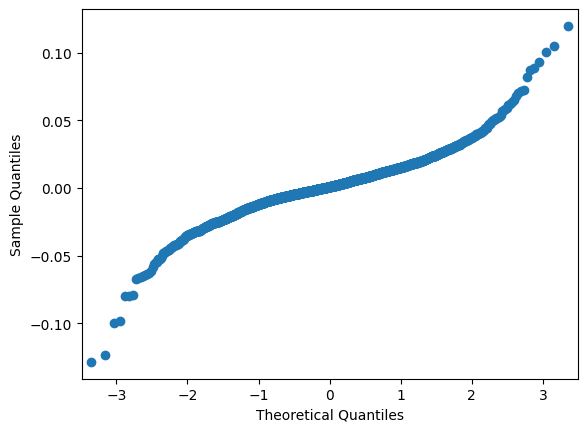

In [27]:
# plot the qqplot to check for a straight line
sm.qqplot(aaplDailyReturns["Close"].values)
pylab.show()

#### Statistical Method

In [28]:
# Used the Shapiro Wilk test for testing Normal Distribution
shapiro(aaplDailyReturns["Close"].values)

ShapiroResult(statistic=0.930935263633728, pvalue=1.3148644875388304e-32)

# OLS Regression to predict AAPL Stock Prices

#### OLS Regression

In [29]:
# making the dependent variable and independent variable arrays
aaplPrevDayClosePrices = aaplClosePrices[0:-1].reset_index().drop(columns=["index"])
aaplClosePrices = aaplClosePrices[1:].reset_index().drop(columns=["index"])
y = aaplClosePrices
x = aaplPrevDayClosePrices
# adding a row of ones for constant
x = sm.add_constant(x)

In [30]:
# fitting OLS
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.856e+06
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:40:49   Log-Likelihood:                -3930.5
No. Observations:                2515   AIC:                             7865.
Df Residuals:                    2513   BIC:                             7877.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0106      0.036     -0.293      0.7

Text(0, 0.5, 'Close')

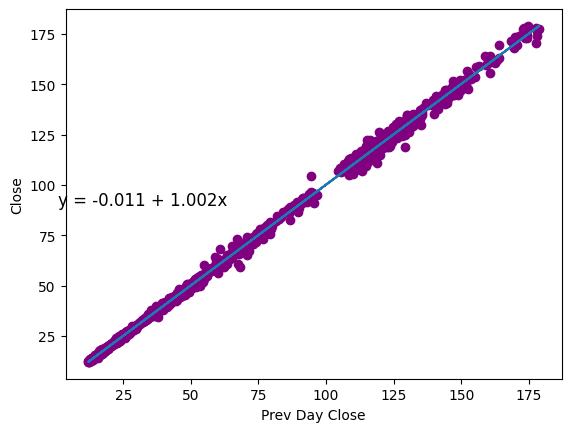

In [31]:
a, b = np.polyfit(aaplPrevDayClosePrices["Close"], aaplClosePrices["Close"], 1)
#add points to plot
plt.scatter(aaplPrevDayClosePrices["Close"], aaplClosePrices["Close"], color='purple')
#add line of best fit to plot
plt.plot(aaplPrevDayClosePrices["Close"], a*aaplPrevDayClosePrices["Close"]+b)
#add fitted regression equation to plot
plt.text(1, 90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)
#add axis labels
plt.xlabel('Prev Day Close')
plt.ylabel('Close')

# Checking Correlation Between a group of Energy and Tech Stocks

In [32]:
# calculating daily returns for all stocks
aaplClosePrices = pd.DataFrame(aapl.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
amznClosePrices = pd.DataFrame(amzn.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
googClosePrices = pd.DataFrame(goog.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
intcClosePrices = pd.DataFrame(intc.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
orclClosePrices = pd.DataFrame(orcl.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
xomClosePrices = pd.DataFrame(xom.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
cvxClosePrices = pd.DataFrame(cvx.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
copClosePrices = pd.DataFrame(cop.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
hesClosePrices = pd.DataFrame(hes.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
oxyClosePrices = pd.DataFrame(oxy.history(start="2012-01-01", end="2021-12-31")["Close"]).reset_index().drop(columns=["Date"])
aaplDailyReturns = aaplClosePrices.pct_change().dropna(axis=0)
amznDailyReturns = amznClosePrices.pct_change().dropna(axis=0)
googDailyReturns = googClosePrices.pct_change().dropna(axis=0)
intcDailyReturns = intcClosePrices.pct_change().dropna(axis=0)
orclDailyReturns = orclClosePrices.pct_change().dropna(axis=0)
xomDailyReturns = xomClosePrices.pct_change().dropna(axis=0)
cvxDailyReturns = cvxClosePrices.pct_change().dropna(axis=0)
copDailyReturns = copClosePrices.pct_change().dropna(axis=0)
hesDailyReturns = hesClosePrices.pct_change().dropna(axis=0)
oxyDailyReturns = oxyClosePrices.pct_change().dropna(axis=0)

In [33]:
# creating a table with all stocks combined
correlation_table = pd.DataFrame()
correlation_table["aapl"] = aaplDailyReturns
correlation_table["amzn"] = amznDailyReturns
correlation_table["goog"] = googDailyReturns
correlation_table["intc"] = intcDailyReturns
correlation_table["orcl"] = orclDailyReturns
correlation_table["xom"] = xomDailyReturns
correlation_table["cvx"] = cvxDailyReturns
correlation_table["cop"] = copDailyReturns
correlation_table["hes"] = hesDailyReturns
correlation_table["oxy"] = oxyDailyReturns

In [34]:
# correlation values
correlation_table.corr()

,aapl,amzn,goog,intc,orcl,xom,cvx,cop,hes,oxy
aapl,1.000000,0.442801,0.513427,0.462041,0.419936,0.315857,0.340085,0.298697,0.293332,0.258331
amzn,0.442801,1.000000,0.578545,0.366643,0.331886,0.226176,0.227381,0.211909,0.229652,0.173110
goog,0.513427,0.578545,1.000000,0.450994,0.422743,0.373371,0.376989,0.339404,0.328611,0.294559
intc,0.462041,0.366643,0.450994,1.000000,0.454165,0.416099,0.424467,0.369746,0.334206,0.323938
orcl,0.419936,0.331886,0.422743,0.454165,1.000000,0.396568,0.408759,0.349622,0.341594,0.291446
xom,0.315857,0.226176,0.373371,0.416099,0.396568,1.000000,0.827382,0.771688,0.720744,0.731325
cvx,0.340085,0.227381,0.376989,0.424467,0.408759,0.827382,1.000000,0.809124,0.707055,0.689208
cop,0.298697,0.211909,0.339404,0.369746,0.349622,0.771688,0.809124,1.000000,0.796259,0.728507
hes,0.293332,0.229652,0.328611,0.334206,0.341594,0.720744,0.707055,0.796259,1.000000,0.733748
oxy,0.258331,0.173110,0.294559,0.323938,0.291446,0.731325,0.689208,0.728507,0.733748,1.000000


<Axes: >

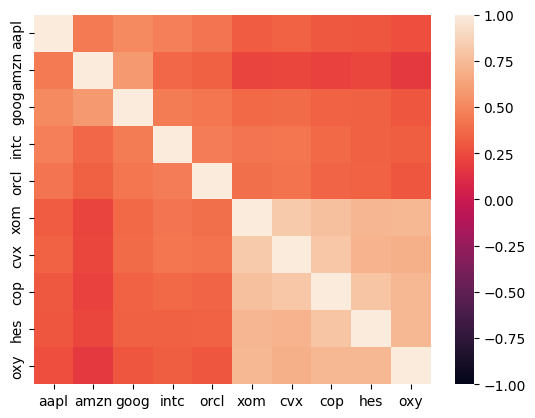

In [35]:
# correlation plotted on heatmap
sns.heatmap(correlation_table.corr(), vmin=-1, vmax=1)

# Performing K-Means Clustering on the 10 stocks

In [36]:
# get data for all stock names from Q1 2020 to Q4 2021
quarterlyData = yf.download(stockNames, start="2020-04-01", end="2022-01-02", interval="3mo")["Adj Close"].reset_index().drop(columns=["Date"])
# calculate quarterly returns
quarterlyReturns = quarterlyData.pct_change().dropna(axis=0)
# create a transposed table for KMeans Clustering
quarterlyReturnsTransposed = quarterlyReturns.transpose()

[*********************100%***********************]  10 of 10 completed


In [37]:
# perform KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(quarterlyReturnsTransposed)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [38]:
# output cluster data
clusters = pd.DataFrame()
clusters["Stock"] = quarterlyReturns.columns.values
clusters["Cluster Number"] = kmeans.labels_
clusters

,Stock,Cluster Number
0,AAPL,0
1,AMZN,0
2,COP,1
3,CVX,1
4,GOOG,0
5,HES,1
6,INTC,0
7,ORCL,0
8,OXY,1
9,XOM,1


# Optimizing Portfolio based on Minimum Variance

### Calculated using quarterly returns in the last question instead of DailyReturns

In [62]:
# function to calculate portfolio returns
def portfolio_returns(weights):
    return (np.sum(quarterlyReturns.mean() * weights))
# function to calculate portfolio variance
def portfolio_var(weights):
    return (np.transpose(weights) @ (quarterlyReturns.cov()) @ weights)

In [63]:
# constraint for portfolio weights summing to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# initial random weights guess
equal_weights = np.array([1 / 10] * 10)
# bound each weight between 0 and 1
bounds = tuple((0, 1) for w in equal_weights)

In [64]:
# optimization problem
min_var_results = sco.minimize(
  # Objective function
  fun = portfolio_var, 
  x0 = equal_weights, 
  method = 'SLSQP',
  bounds = bounds, 
  constraints = constraints
)

In [65]:
# return of minimum variance portfolio
min_var_port_return = portfolio_returns(min_var_results["x"])
round(min_var_port_return, 4)

0.0791

In [66]:
# variance of minimum variance portfolio
min_var_port_var = portfolio_var(min_var_results["x"])
round(min_var_port_var, 4)

0.0013

In [67]:
# output portfolio stocks and weights
portfolio = pd.DataFrame()
portfolio["Stock"] = quarterlyReturns.columns.values
portfolio["Weight"] = min_var_results["x"]
portfolio["Weight"] = portfolio["Weight"].map(lambda x: round(x, 4))
portfolio

,Stock,Weight
0,AAPL,0.3077
1,AMZN,0.1520
2,COP,0.2400
3,CVX,0.0000
4,GOOG,0.0000
5,HES,0.0000
6,INTC,0.0952
7,ORCL,0.2050
8,OXY,0.0000
9,XOM,0.0000
